## Problem Set 5 - Ryan Yordanoff - BF550

# Problem 1
Let’s pretend that we are designing a veterinary trial for a vaccine against Hepatitis E for pigs. The
probability to become infected following an exposure is pc = 0.5 for untreated pigs. The developer of the
vaccine believes that this probability is reduced to pv = 0.1 following vaccination. The control and treatment
arms have the same number of pigs, N, and the statistical significance is evaluated via a permutation test.
How should we choose N to ensure that we have approximately 90% chance of seeing a difference between
the control and treatment arms that is significant at α = 0.05 level?

In [15]:
import numpy as np
from numpy import random

def control(n):
    """Simulates a Hepatitis E exposure probability of 50% and returns a list of n pigs
    with: no infection = 0 and infection = 1"""
    pigs = []

    for i in range(n):
        roll = random.random()
        if roll >= .5: #not infected
            pigs.append(0)
        else:
            pigs.append(1) #infected

    return pigs


def vaccination(n):
    """Simulates a vaccinated Hepatitis E exposure probability of 10% and returns a
    list of n pigs with: no infection = 0 and infection = 1"""
    pigs = []
    
    for i in range(n):
        roll = random.random()
        if roll >= .1: #not infected
            pigs.append(0)
        else:
            pigs.append(1) #infected

    return pigs

def permutation_test(c,v,p=2000 ):
    """Takes 2 lists c (control) & v (vaccinated) and performs permuation test 
    with # of permutations = p.  Returns the initial test statistic in index 0 and
    a list including a test statistic from each permutation"""
    initial_test_difference = abs(np.average(c) - np.average(v))
    all_pigs = c + v
    permutation_results = []


    for i in range(p):
        random.shuffle(all_pigs)
        first_half = all_pigs[:int((len(all_pigs))/2)]
        second_half = all_pigs[int((len(all_pigs))/2):]
        permutation_results.append(abs(np.average(first_half)-np.average(second_half)))

    return initial_test_difference, permutation_results

def permutation_test_pval(b,a):
    """Takes an initial test statistic = b and determines p-value from list of
    test statistics from permutation results = a."""
    more_extreme_count = 0    
    
    for i in a:
        if i > b:
            more_extreme_count += 1

    pval = more_extreme_count/len(a)
    
    return pval


def p_val_simulator(n, r=2000, a=0.05):
    """For number of pigs (n) this runs a permutation test (permutation_test) r times
    and determines p-value (permutation_test_pval) r times. Each run (r) significance is
    determined at significance level threshold (a).  
    Value returned = Percentage there is a statistically significant difference for n pigs.
      """
    significant = [] #0 = non-significant 1 = significant

    for i in range(r):
        vaccinated_group = vaccination(n)
        control_group = control(n)
        temp_perm = permutation_test(control_group, vaccinated_group)
        p_val = permutation_test_pval(temp_perm[0],temp_perm[1])

        if p_val < a:
            significant.append(1)
        else:
            significant.append(0)
    
    percent_pass_permuation_test = significant.count(1)/(len(significant))

    return percent_pass_permuation_test

def multi_pval_simulator(n,r=20):
    """Runs p_val_simulator r times for n pigs.
    Value returned = Percentage there is a statistically significant difference for n pigs.
    """
    percentages = []

    for i in range(r):
        percentages.append(p_val_simulator(n))

    return np.average(percentages)

def range_p_val_simulator(l,m):
    """Tests a range of n values for Percentage there is a statistically significant
    difference for n pigs.
    l = the lower bound of the range and m = the upper bound of the range of N 
    pigs you want to test.
    Returns: [index0] List of N values and [index1] list of percentage there is a 
    statistically significant difference for n pigs"""
    n_value = []
    percent = []


    for i in range(l,m):
        n_value.append(i)
        percent.append(p_val_simulator(i))

    return n_value, percent


Distribution of Test-Statistics of a Single Permutation Test

initial test statistic: 0.38888888888888884
P-Value: 0.002


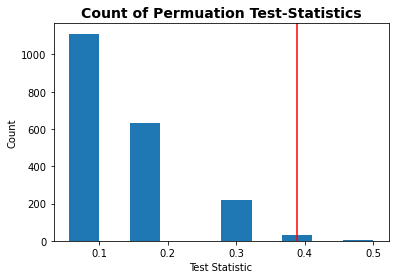

In [14]:
import matplotlib.pyplot as plt
N = 18

control_1 = control(N)  
vaccination_1 = vaccination(N)
test1 = permutation_test(control_1, vaccination_1,p=2000)

print(f'initial test statistic: {test1[0]}')

print(f'P-Value: {permutation_test_pval(test1[0],test1[1])}')

plt.hist(test1[1])
plt.xlabel('Test Statistic')
plt.ylabel('Count')
plt.title('Count of Permuation Test-Statistics', fontweight = 'bold', fontsize = 14)
plt.axvline(x=test1[0], color = 'red') #red line equal to initial test statistic

plt.show()

Permutation test with 2000 permutations per run, ran 2000 times at α = 0.05, for a range of N values. Used to determine a suitable value of N at approximately 90% chance of seeing a significant difference between the control and treatment groups.  *Warning the following two calculations took 30 minutes each.*

In [3]:
multi_try = range_p_val_simulator(5,30)

print(multi_try)

([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [0.7515, 0.67, 0.7035, 0.7325, 0.729, 0.7385, 0.7805, 0.7965, 0.8365, 0.8415, 0.865, 0.859, 0.888, 0.9005, 0.9165, 0.9205, 0.9265, 0.9465, 0.945, 0.949, 0.9475, 0.956, 0.9665, 0.968, 0.9725])


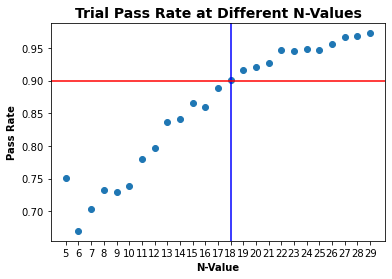

In [9]:
import matplotlib.pyplot as plt

plt.scatter(multi_try[0],multi_try[1])
plt.xlabel('N-Value', fontweight = 'bold')
plt.ylabel('Pass Rate', fontweight = 'bold')
plt.title('Trial Pass Rate at Different N-Values', fontweight = 'bold', fontsize = 14)
plt.axvline(x=18, color='blue')
plt.axhline(y=.90, color='red')
plt.xticks(range(min(multi_try[0]),max(multi_try[0])+1,1))
plt.show()

In [10]:
#Used to confirm that there is indeed about 90% chance that the trial passes the statistical test
n_equal_18 = multi_pval_simulator(18)

In [11]:
print(n_equal_18)

0.8977499999999999


With the computations above, I conclude that N = 18 has approximately a 90% chance of seeing a difference between
the control and treatment groups.

# Supplementary Material (to show that code is running correctly)

In [67]:
N = 15

S_control_1 = control(N)  
S_vaccination_1 = vaccination(N)
S_test1 = permutation_test(S_control_1, S_vaccination_1,p=100)


print(S_control_1)
print(S_vaccination_1)
print(S_test1)



[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
(0.2666666666666667, [0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.0, 0.1333333333333333, 0.1333333333333333, 0.0, 0.0, 0.1333333333333333, 0.1333333333333333, 0.0, 0.0, 0.2666666666666667, 0.0, 0.1333333333333333, 0.1333333333333333, 0.0, 0.0, 0.1333333333333333, 0.4, 0.1333333333333333, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.0, 0.0, 0.1333333333333333, 0.2666666666666667, 0.0, 0.0, 0.1333333333333333, 0.2666666666666667, 0.2666666666666667, 0.1333333333333333, 0.2666666666666667, 0.0, 0.4, 0.0, 0.2666666666666667, 0.0, 0.1333333333333333, 0.1333333333333333, 0.0, 0.2666666666666667, 0.1333333333333333, 0.1333333333333333, 0.2666666666666667, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.0, 0.1333333333333333, 0.2666666666666667, 0.1333333333333333, 0.0, 0.0, 0.1333333333333333, 0.1333333333333333, 0

In [69]:
S_test2 = permutation_test_pval(S_test1[0],S_test1[1])

print(f'p-value = {S_test2}')

p-value = 0.05


In [74]:
S_test3 = p_val_simulator(15,r=10,a=0.05)

print(f'Percent N=15 is significant in simulation: {S_test3}')

Percent N=15 is significant in simulation: 0.7
